In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from price_data import get_price_data, gpd_help
from CSmodel import CompetitiveStorageModel

In [50]:
gpd_help()

List of valid ticker inputs:
       Commodity Input Value
0           Gold        GC=F
1         Silver        SI=F
2       Platinum        PL=F
3         Copper        HG=F
4      Palladium        PA=F
5      Crude Oil        CL=F
6    Heating Oil        HO=F
7    Natural Gas        NG=F
8  RBOB Gasoline        RB=F


In [51]:
df=get_price_data('GC=F')
df

[*********************100%%**********************]  1 of 1 completed


,Date,Price
0,2000-08-30,273.899994
1,2000-08-31,278.299988
2,2000-09-01,277.000000
3,2000-09-05,275.799988
4,2000-09-06,274.200012
...,...,...
5955,2024-05-24,2332.500000
5956,2024-05-28,2355.199951
5957,2024-05-29,2340.300049
5958,2024-05-30,2342.899902


Text(0, 0.5, 'Price')

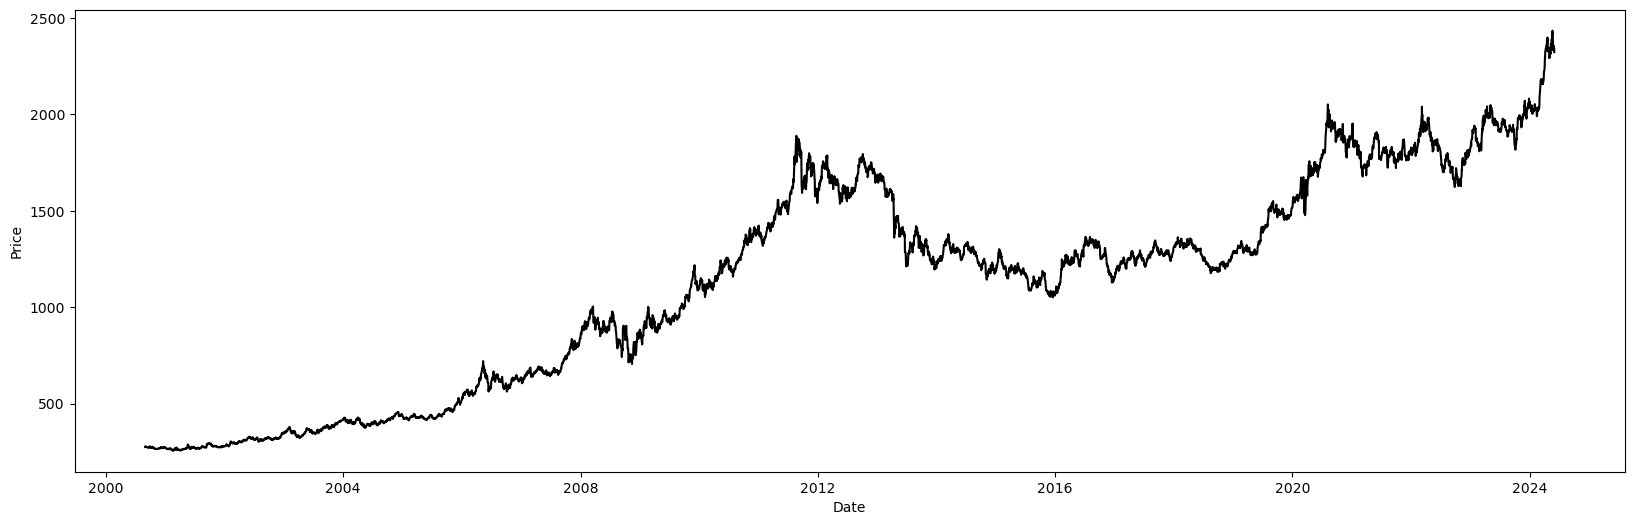

In [52]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'],df['Price'], c='black')
plt.xlabel('Date')
plt.ylabel('Price')


In [53]:
# Example usage
model = CompetitiveStorageModel(a=1.0, b=-0.5, r=0.05, delta=0.1, mu=0.0, sigma=1.0, rho=0.5)
print(model)


CompetitiveStorageModel(a=1.0, b=-0.5, r=0.05, delta=0.1, mu=0.0, sigma=1.0, rho=0.5)


In [54]:
# Generate shocks
shocks = model.generate_shocks(len(df['Date']))
print(shocks)

[0.25139127 0.74227873 0.79703619 ... 1.32246924 1.31066022 1.28623558]


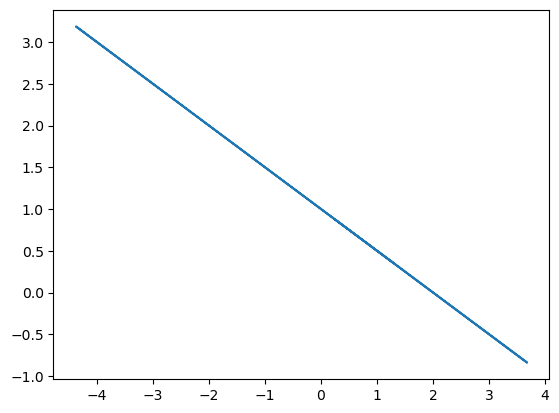

In [55]:
inv = model.inverse_demand(shocks)
plt.plot(shocks, inv)

Pr(z_t+1 <= 1.0 | z_t = -0.3963694610601202) = 0.8845774457466647
